# Import Library

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.set_option('display.max_columns', 200)
pd.options.display.float_format = '{:,.2f}'.format

print(pd.__version__)
print(np.__version__)

2.2.3
2.2.1


# Load Data

In [97]:
data_fit = pd.read_csv('data_fit.csv')
print(data_fit.info())
data_fit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285446 entries, 0 to 285445
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 285446 non-null  int64  
 1   AMT_INCOME_TOTAL             285446 non-null  float64
 2   AMT_CREDIT                   285446 non-null  float64
 3   AMT_ANNUITY                  285446 non-null  float64
 4   AMT_GOODS_PRICE              285446 non-null  float64
 5   DAYS_BIRTH                   285446 non-null  int64  
 6   DAYS_EMPLOYED                285446 non-null  int64  
 7   FLAG_EMP_PHONE               285446 non-null  int64  
 8   FLAG_WORK_PHONE              285446 non-null  int64  
 9   FLAG_PHONE                   285446 non-null  int64  
 10  CNT_FAM_MEMBERS              285446 non-null  float64
 11  REGION_RATING_CLIENT         285446 non-null  int64  
 12  REGION_RATING_CLIENT_W_CITY  285446 non-null  int64  
 13 

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE,TARGET
0,0,"202,500.00","406,597.50","24,700.50","351,000.00",-9461,-637,1,0,1,1.00,2,2,0,0,0,0,0,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,877.50,1.00,"-1,180.00","-1,187.00","6,948.36","6,948.36",Cash loans,N,Y,Working,Closed,1
1,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",-16765,-1188,1,0,1,2.00,1,1,0,0,0,0,0,1.00,1.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"-2,156.00","-2,156.00","1,716.53","1,716.53",Cash loans,N,N,State servant,Active,0
2,0,"67,500.00","135,000.00","6,750.00","135,000.00",-19046,-225,1,1,1,1.00,2,2,0,0,0,0,0,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,-63.00,-63.00,"25,425.00","25,425.00",Revolving loans,Y,Y,Working,Active,0
3,0,"121,500.00","513,000.00","21,865.50","513,000.00",-19932,-3038,1,0,0,1.00,2,2,0,0,0,1,1,0.00,0.00,"-1,106.00",0,0,0,1,0,0,0,0,0,0,0,0,0,"11,547.00",1.00,"-1,383.00","-1,366.00","2,165.04","2,160.59",Cash loans,N,Y,Working,Active,0
4,0,"99,000.00","490,495.50","27,517.50","454,500.00",-16941,-1588,1,1,1,2.00,2,2,0,0,0,0,0,0.00,0.00,"-2,536.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"-1,384.00","-1,417.00","5,970.38","5,970.38",Cash loans,N,Y,State servant,Active,0


# EDA

In [98]:
# Pisahkan kolom numerik dan kategory
col_num = data_fit.select_dtypes(include='number').columns
col_cat = data_fit.select_dtypes(include='object').columns

In [99]:
# Deskripsi Statistik Kolom Numerik

data_fit[col_num].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
count,"285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00","285,446.00"
mean,0.42,"168,749.13","599,424.79","27,147.09","538,336.06","-16,042.91","63,889.72",0.82,0.20,0.28,2.15,2.05,2.03,0.02,0.05,0.08,0.23,0.18,1.42,1.40,-964.94,0.00,0.71,0.09,0.08,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,"1,781.53",0.34,"-1,044.48","-1,053.20","17,152.20","17,412.65",0.08
std,0.72,"244,527.72","401,810.32","14,478.61","368,749.16","4,361.99","141,340.11",0.38,0.40,0.45,0.91,0.51,0.50,0.12,0.22,0.27,0.42,0.38,2.41,2.38,827.28,0.01,0.45,0.28,0.27,0.06,0.06,0.06,0.05,0.03,0.10,0.02,0.09,0.02,"15,727.61",2.50,801.58,801.16,"53,145.61","58,028.73",0.27
min,0.00,"25,650.00","45,000.00","1,615.50","45,000.00","-25,229.00","-17,912.00",0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-4,292.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-2,922.00","-3,026.00",0.00,0.00,0.00
25%,0.00,"112,500.00","270,000.00","16,573.50","238,500.00","-19,684.00","-2,761.00",1.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,571.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-1,658.00","-1,667.00","4,176.25","3,375.00",0.00
50%,0.00,"148,500.00","517,500.00","24,939.00","450,000.00","-15,756.00","-1,214.00",1.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-760.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-823.00,-831.00,"8,855.10","8,100.00",0.00
75%,1.00,"202,500.00","808,650.00","34,623.00","679,500.00","-12,420.25",-289.00,1.00,0.00,1.00,3.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,-276.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-361.00,-370.00,"16,603.74","15,975.10",0.00
max,19.00,"117,000,000.00","4,050,000.00","258,025.50","4,050,000.00","-7,489.00","365,243.00",1.00,1.00,1.00,20.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00,348.00,344.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,"1,440,180.00",142.00,-2.00,-2.00,"2,544,234.00","2,544,234.00",1.00


In [100]:
# Deskripsi Statistik Kolom Kategori

data_fit[col_cat].describe()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE
count,285446,285446,285446,285446,285446
unique,2,2,2,8,4
top,Cash loans,N,Y,Working,Closed
freq,259245,188396,198416,147509,184747


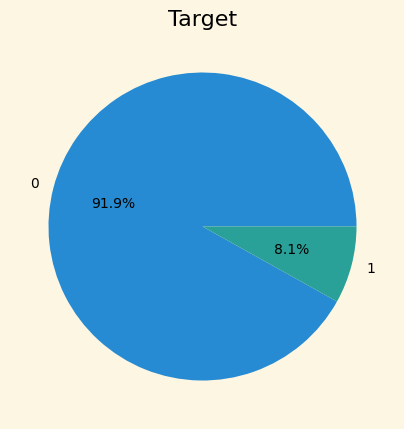

In [101]:
# Univariate analysisi

plt.style.use('Solarize_Light2')
count = data_fit['TARGET'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index, autopct='%1.1f%%')
plt.title("Target")
plt.show()

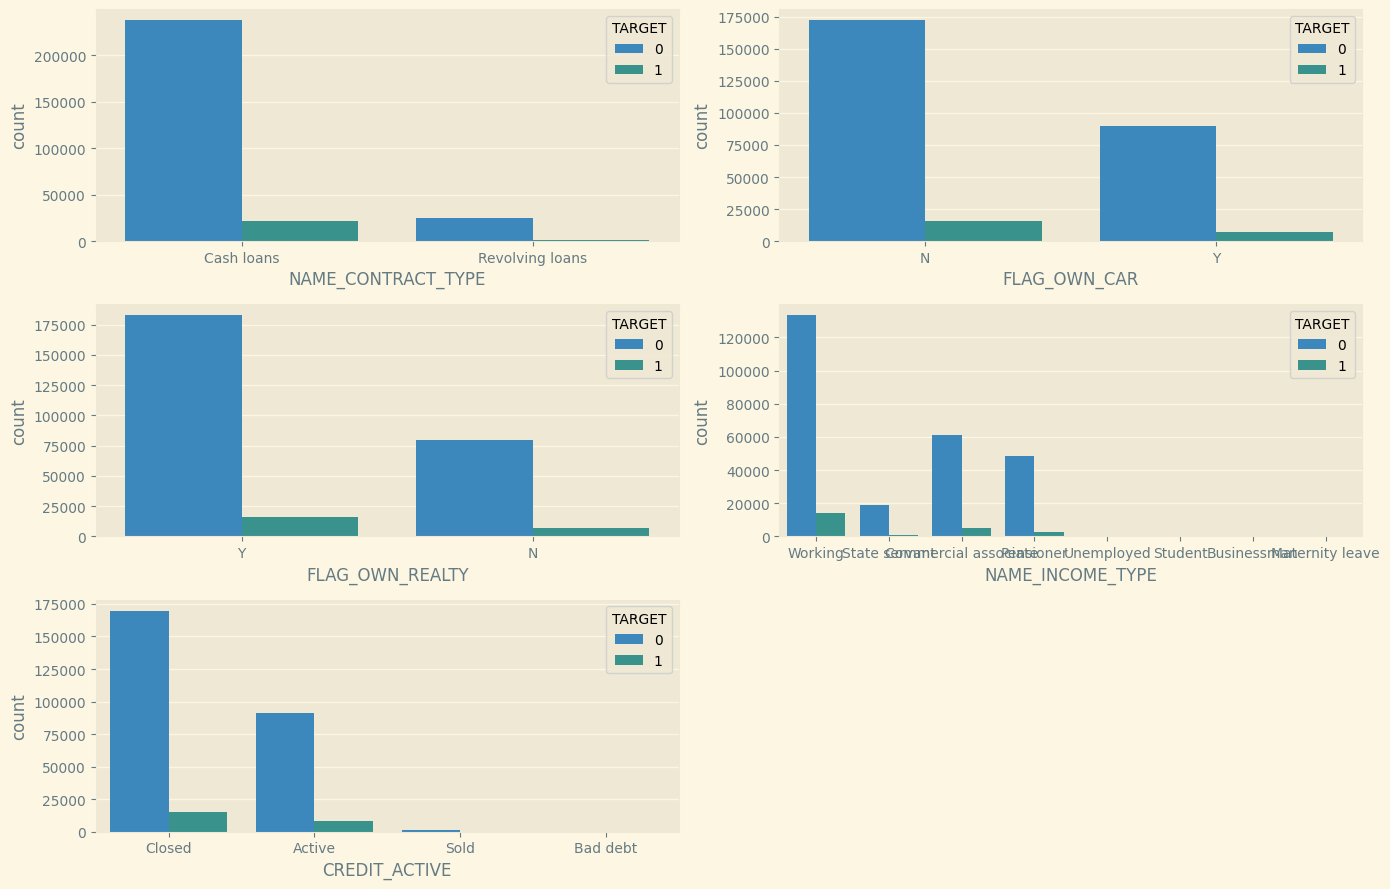

In [102]:
# Bivariate Analysisi


plt.figure(figsize=(14,9))
for i in range(0, len(col_cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=col_cat[i],hue = 'TARGET',data=data_fit)
    plt.tight_layout()

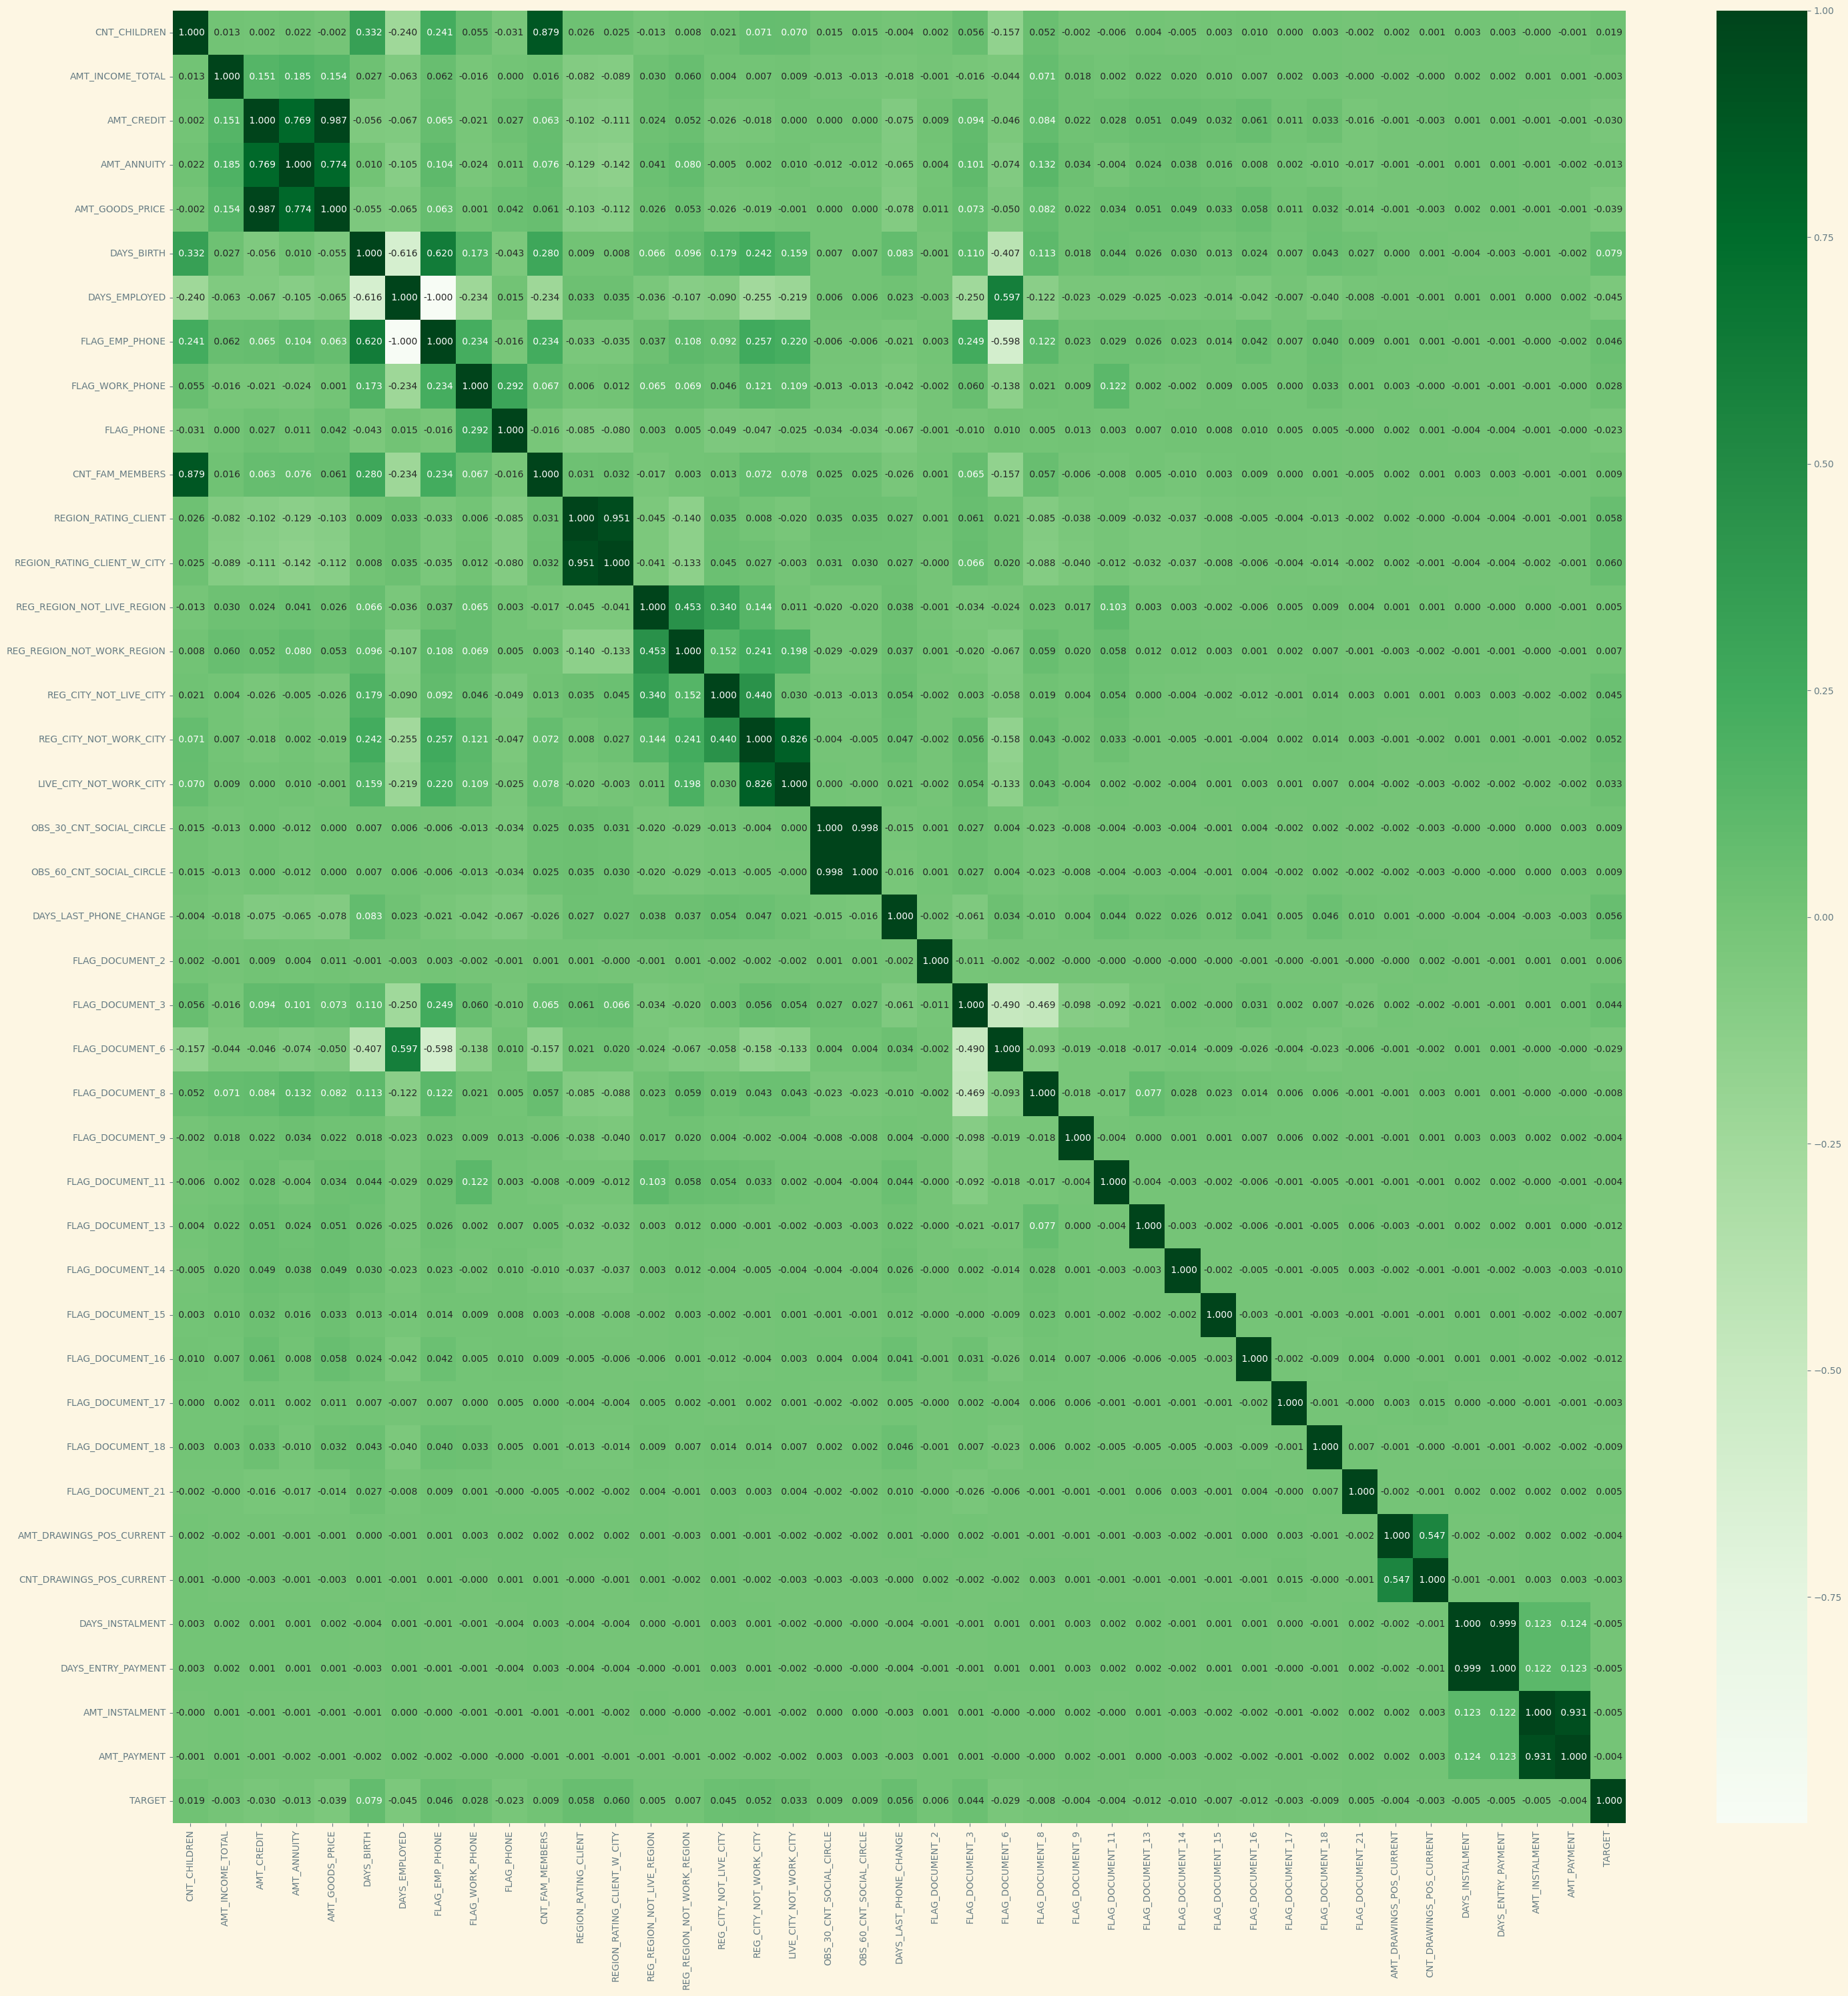

In [103]:
# Multivariate Analysisi

# Ambil hanya kolom numerik
numeric_data = data_fit.select_dtypes(include=['number'])
plt.figure(figsize=(30,30))
sns.heatmap(numeric_data.corr(), cmap="Greens", annot=True, fmt=' .3f')
plt.tight_layout()

In [104]:
drop_redundan = ['CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_CREDIT','REGION_RATING_CLIENT_W_CITY',
                 'LIVE_CITY_NOT_WORK_CITY','DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT','AMT_PAYMENT']

# Preprocessing Data

In [105]:
# Drop Redundant Column

data_prep = data_fit.copy()
data_prep = data_prep.drop(drop_redundan, axis=1)

In [106]:
# Split Target dan Feature
Y = data_prep['TARGET'] # ---- Target Column
X = data_prep.drop('TARGET', axis=1) # ---- Feature Column
num_col_X = X.select_dtypes(include='number').columns

In [107]:
# Handling Missing Value

data_prep.isna().any().sum()

np.int64(0)

In [108]:
# Handling Duplicate Data

data_prep[data_prep.duplicated(keep=False)]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE,TARGET


In [109]:
# Handling Outlier

for j in num_col_X:
    Q1 = data_prep[j].quantile(0.25)
    Q3 = data_prep[j].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    filter_nonoutlier = (data_prep[j] >= lower) & (data_prep[j] <= upper)
    data_prep_nonout = data_prep[filter_nonoutlier]
data_prep_nonout.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE,TARGET
0,0,"202,500.00","351,000.00",-9461,-637,1,0,1,2,0,0,0,0,2.00,2.00,"-1,134.00",0,1,0,0,0,0,0,0,0,0,0,0,0,877.50,1.00,"6,948.36",Cash loans,N,Y,Working,Closed,1
1,0,"270,000.00","1,129,500.00",-16765,-1188,1,0,1,1,0,0,0,0,1.00,1.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"1,716.53",Cash loans,N,N,State servant,Active,0
2,0,"67,500.00","135,000.00",-19046,-225,1,1,1,2,0,0,0,0,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"25,425.00",Revolving loans,Y,Y,Working,Active,0
3,0,"121,500.00","513,000.00",-19932,-3038,1,0,0,2,0,0,0,1,0.00,0.00,"-1,106.00",0,0,0,1,0,0,0,0,0,0,0,0,0,"11,547.00",1.00,"2,165.04",Cash loans,N,Y,Working,Active,0
4,0,"99,000.00","454,500.00",-16941,-1588,1,1,1,2,0,0,0,0,0.00,0.00,"-2,536.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,"5,970.38",Cash loans,N,Y,State servant,Active,0


In [110]:
# Split Target dan Feature
Y1 = data_prep_nonout['TARGET'] # ---- Target Column
X1 = data_prep_nonout.drop('TARGET', axis=1) # ---- Feature Column

In [111]:
# Train Test Split

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1, Y1, test_size=0.3, random_state=42)
print('counts of feature rows and columns for train dataset (Xtrain):', Xtrain.shape)
print('counts of target rows and columns for train dataset (Ytrain):', Ytrain.shape)
print('counts of feature rows and columns for test dataset (Xtest):', Xtest.shape)
print('counts of target rows and columns for test dataset (Ytest):', Ytest.shape)

counts of feature rows and columns for train dataset (Xtrain): (183557, 37)
counts of target rows and columns for train dataset (Ytrain): (183557,)
counts of feature rows and columns for test dataset (Xtest): (78668, 37)
counts of target rows and columns for test dataset (Ytest): (78668,)


In [112]:
# Feature Transformation

from sklearn.preprocessing import StandardScaler

Xtrain_norm = Xtrain.copy()
Xtest_norm = Xtest.copy()
for k in num_col_X:
    Xtrain_norm[k] = StandardScaler().fit_transform(Xtrain_norm[k].values.reshape(len(Xtrain_norm),1))
    Xtest_norm[k] = StandardScaler().fit_transform(Xtest_norm[k].values.reshape(len(Xtest_norm),1))

In [113]:
# Feature Encoding

map_NAME_CONTRACT_TYPE = {'Cash loans':0,'Revolving loans':1}
map_FLAG_OWN_CAR = {'N':0,'Y':1}
map_FLAG_OWN_REALTY = {'N':0,'Y':1}
map_CREDIT_ACTIVE = {'Bad debt':0,'Sold':1,'Closed':2,'Active':3}
map_NAME_INCOME_TYPE = {'Unemployed':0,'Maternity leave':1,'Pensioner':2,'Student':3,
                       'Working':4,'State servant':5,'Commercial associate':6,'Businessman':7}

Xtrain_norm['NAME_CONTRACT_TYPE'] = Xtrain_norm['NAME_CONTRACT_TYPE'].map(map_NAME_CONTRACT_TYPE)
Xtrain_norm['FLAG_OWN_CAR'] = Xtrain_norm['FLAG_OWN_CAR'].map(map_FLAG_OWN_CAR)
Xtrain_norm['FLAG_OWN_REALTY'] = Xtrain_norm['FLAG_OWN_REALTY'].map(map_FLAG_OWN_REALTY)
Xtrain_norm['CREDIT_ACTIVE'] = Xtrain_norm['CREDIT_ACTIVE'].map(map_CREDIT_ACTIVE)
Xtrain_norm['NAME_INCOME_TYPE'] = Xtrain_norm['NAME_INCOME_TYPE'].map(map_NAME_INCOME_TYPE)

Xtest_norm['NAME_CONTRACT_TYPE'] = Xtest_norm['NAME_CONTRACT_TYPE'].map(map_NAME_CONTRACT_TYPE)
Xtest_norm['FLAG_OWN_CAR'] = Xtest_norm['FLAG_OWN_CAR'].map(map_FLAG_OWN_CAR)
Xtest_norm['FLAG_OWN_REALTY'] = Xtest_norm['FLAG_OWN_REALTY'].map(map_FLAG_OWN_REALTY)
Xtest_norm['CREDIT_ACTIVE'] = Xtest_norm['CREDIT_ACTIVE'].map(map_CREDIT_ACTIVE)
Xtest_norm['NAME_INCOME_TYPE'] = Xtest_norm['NAME_INCOME_TYPE'].map(map_NAME_INCOME_TYPE)

In [114]:
# Class Imbalance 

from imblearn import under_sampling, over_sampling
Xtrain_os, Ytrain_os = over_sampling.SMOTE().fit_resample(Xtrain_norm, Ytrain)

In [115]:
Xtrain_os.sample(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE
328499,2.07,-0.04,1.13,0.28,-0.47,0.47,-0.50,1.60,-0.27,-0.12,4.33,-0.29,-0.55,-0.61,-0.61,1.16,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,0.70,0,0,1,4,2
46393,0.81,-0.27,-0.20,1.44,-0.47,0.47,2.00,-0.63,-0.10,-0.12,-0.23,-0.29,1.83,2.41,2.44,0.45,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.07,0,1,1,4,3
326242,-0.58,-0.02,-0.70,1.32,-0.47,0.47,-0.50,-0.63,-0.10,-0.12,-0.23,3.44,1.83,0.46,0.47,0.05,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.68,0,0,1,6,2
98248,-0.58,0.04,0.37,-1.17,2.12,-2.12,-0.50,-0.63,-2.07,-0.12,-0.23,-0.29,-0.55,3.71,3.75,-0.12,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.83,0,0,1,2,2
253669,-0.58,-0.02,-0.37,0.27,-0.46,0.47,-0.50,-0.63,-0.10,-0.12,-0.23,-0.29,1.83,0.53,0.54,0.44,-0.01,0.64,-0.31,-0.30,-0.06,-0.06,-0.06,-0.05,-0.04,-0.10,-0.02,-0.09,-0.02,-0.12,-0.14,-0.53,0,0,1,4,2


In [116]:
Xtest_norm.sample(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_21,AMT_DRAWINGS_POS_CURRENT,CNT_DRAWINGS_POS_CURRENT,AMT_INSTALMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CREDIT_ACTIVE
121769,-0.58,1.44,-0.06,-1.04,-0.51,0.47,-0.50,-0.62,1.86,-0.13,-0.23,-0.29,-0.55,-0.18,-0.18,-0.61,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,0.52,0,0,1,4,2
53422,-0.58,-1.00,-0.97,-1.42,2.14,-2.14,-0.50,-0.62,-0.10,-0.13,-0.23,-0.29,-0.55,-0.61,-0.61,0.26,-0.01,-1.58,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,0.56,1,0,0,2,3
94812,-0.58,-0.11,-0.73,-1.15,2.14,-2.14,-0.50,-0.62,-0.10,-0.13,-0.23,-0.29,-0.55,-0.18,-0.18,1.17,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,-0.77,0,0,1,2,2
73973,-0.58,-0.07,-0.12,-0.47,-0.47,0.47,-0.50,-0.62,-0.10,-0.13,-0.23,-0.29,-0.55,-0.61,-0.61,-2.67,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,-1.20,0,1,1,4,3
13829,-0.58,0.33,0.37,-0.45,-0.46,0.47,-0.50,-0.62,-0.10,-0.13,4.31,-0.29,1.82,0.25,0.26,0.13,-0.01,0.63,-0.31,-0.30,-0.06,-0.06,-0.06,-0.06,-0.03,-0.09,-0.02,-0.09,-0.02,-0.11,-0.13,-0.34,0,0,1,4,3


In [117]:
Ytrain_os.sample(5)

202203    1
324970    1
247589    1
259629    1
246629    1
Name: TARGET, dtype: int64

In [118]:
Ytest.sample(5)

276262    0
261765    0
200357    0
168223    0
260043    0
Name: TARGET, dtype: int64

In [119]:
Ytrain_os.value_counts()

TARGET
0    168602
1    168602
Name: count, dtype: int64

# Machine Learning Model

## Log Regression Model

Evalation Matrix:

Accuracy Test: 0.61
Accuracy Train: 0.626
------------------------------------------------------------
AUC Score Test: 0.599
AUC Score Train: 0.626
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.61      0.74     72292
           1       0.12      0.59      0.20      6376

    accuracy                           0.61     78668
   macro avg       0.53      0.60      0.47     78668
weighted avg       0.88      0.61      0.70     78668

------------------------------------------------------------
Confusion Matrix:



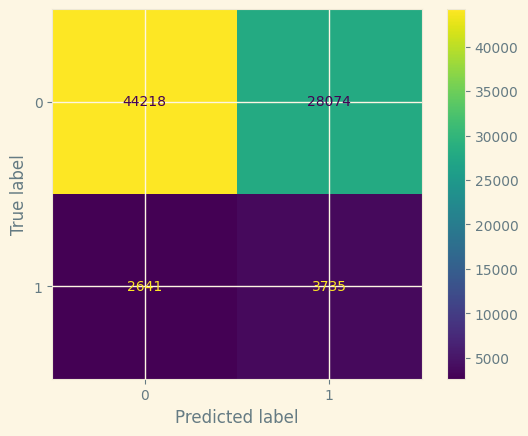

{'C': 1e-05, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, f1_score, recall_score, confusion_matrix, roc_auc_score

def evaluation(model):
    Y_pred = model.predict(Xtest_norm)
    Y_pred_train = model.predict(Xtrain_os)
    
    print('Evalation Matrix:\n')
    print('Accuracy Test:', round(accuracy_score(Ytest, Y_pred), 3))
    print('Accuracy Train:', round(accuracy_score(Ytrain_os, Y_pred_train), 3))
    print('----------' * 6)
    print('AUC Score Test:', round(roc_auc_score(Ytest, Y_pred),3))
    print('AUC Score Train:', round(roc_auc_score(Ytrain_os, Y_pred_train), 3))
    print('----------' * 6)
    print('Classification Report:\n', classification_report(Ytest, Y_pred))
    print('----------' * 6)
    print('Confusion Matrix:\n')
    cm = confusion_matrix(Ytest, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    #print('Confusion Matrix:\n', confusion_matrix(Ytest, Y_pred))

model_lr = LogisticRegression(penalty='l2', solver='lbfgs', C=0.00001, random_state=42) #'newton-cg','sag', 'saga', C=0.00001
model_lr.fit(Xtrain_os, Ytrain_os)
evaluation(model_lr)
print(model_lr.get_params(deep=True))
    

In [121]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Decision Tree

Evalation Matrix:

Accuracy Test: 0.664
Accuracy Train: 0.619
------------------------------------------------------------
AUC Score Test: 0.566
AUC Score Train: 0.619
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.79     72292
           1       0.11      0.45      0.18      6376

    accuracy                           0.66     78668
   macro avg       0.52      0.57      0.48     78668
weighted avg       0.87      0.66      0.74     78668

------------------------------------------------------------
Confusion Matrix:



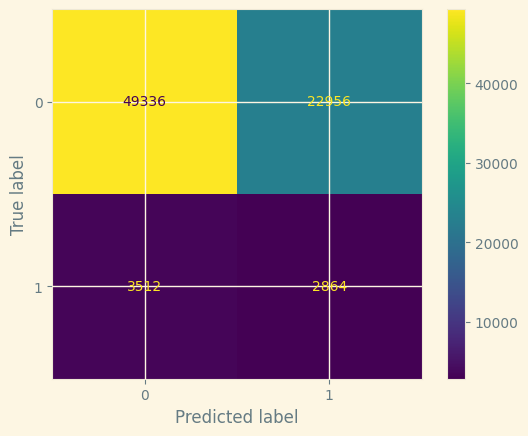

In [122]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=None ,min_samples_split=10, random_state=42)
model_dt.fit(Xtrain_os, Ytrain_os)
evaluation(model_dt)

C:\Users\RADITYA  AKHILA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RADITYA  AKHILA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RADITYA  AKHILA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\RADITYA  AKHILA\AppData\Local\Programs\Python\Pyt

Evalation Matrix:

Accuracy Test: 0.67
Accuracy Train: 0.731
------------------------------------------------------------
AUC Score Test: 0.552
AUC Score Train: 0.731
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79     72292
           1       0.11      0.41      0.17      6376

    accuracy                           0.67     78668
   macro avg       0.52      0.55      0.48     78668
weighted avg       0.86      0.67      0.74     78668

------------------------------------------------------------
Confusion Matrix:



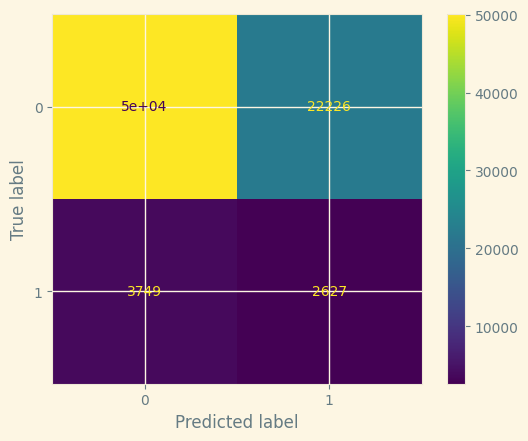

{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 31, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=31, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, random_state=42, splitter='random')


In [123]:
max_depth = [int(x) for x in np.linspace(1,110, num=111)]
min_samples_split = [2,5,10,100]
min_samples_leaf = [1,2,4,10,20,50]
max_features = ['auto','sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split,
                      min_samples_leaf = min_samples_leaf, max_features=max_features,
                      criterion=criterion, splitter=splitter)

model_dt2 = DecisionTreeClassifier(random_state=42)
rs_dt = RandomizedSearchCV(model_dt2, hyperparameters, scoring='roc_auc')
rs_dt.fit(Xtrain_os, Ytrain_os)
evaluation(rs_dt)
print(rs_dt.best_params_)
print(rs_dt.best_estimator_)

param values: 1; train: 0.57; test: 0.52
param values: 2; train: 0.61; test: 0.55
param values: 3; train: 0.62; test: 0.57
param values: 4; train: 0.63; test: 0.57
param values: 5; train: 0.66; test: 0.57


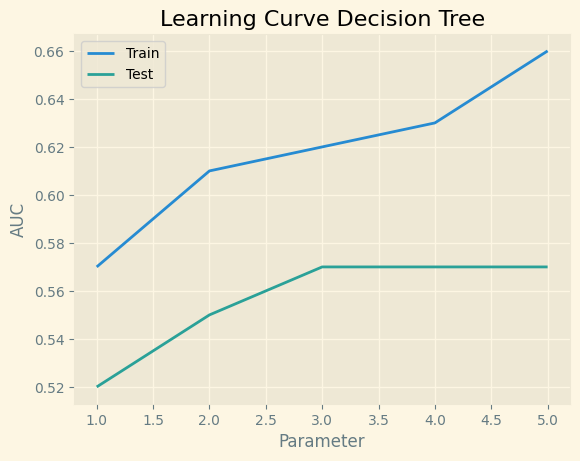

In [125]:
def draw_learningcurve(param_values):
    train_scores = []
    test_scores = []
    
    #param_values = [int(x) for x in np.linspace(2500, 5000, 100)]
    for i in param_values:
        model_dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=None,min_samples_split=10, random_state=42)
        model_dt3.fit(Xtrain_os, Ytrain_os)
        
        #eval on train
        y_pred_train = model_dt3.predict(Xtrain_os)
        train_eval = roc_auc_score(Ytrain_os, y_pred_train).round(2)
        train_scores.append(train_eval)
        
        #eval on test
        y_pred = model_dt3.predict(Xtest_norm)
        test_eval = roc_auc_score(Ytest, y_pred).round(2)
        test_scores.append(test_eval)
        
        print('param values: ' + str(i) + '; train: ' + str(train_eval) + '; test: '+ str(test_eval))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve Decision Tree')
    plt.legend()
    plt.show()
    
param_values = [int(x) for x in np.linspace(1, 5, 5)]
draw_learningcurve(param_values)

# The Best Model

In [126]:
model = {'Model Name':['Logistic Regression', 'Decision Tree'], 'Accuracy':[0.609,0.347], 
     'Roc_Auc':[0.599,0.518], 'The Best Model':['The Best','Not The Best']}
evaluasi = pd.DataFrame(model).set_index('Model Name')
evaluasi

,Accuracy,Roc_Auc,The Best Model
Model Name,,,
Logistic Regression,0.61,0.60,The Best
Decision Tree,0.35,0.52,Not The Best


# Feature Importance

In [127]:
B0 = model_lr.intercept_
B1 = model_lr.coef_[0]
print('Nilai Intercep:', B0.round(2))
print('Coef Regression:', B1.round(2))
Reg = pd.DataFrame({'Feature':Xtrain_os.columns, 'Coef_Regression':B1}, index=None)
Reg = Reg.sort_values('Coef_Regression', ascending=False)
Reg

Nilai Intercep: [0.4]
Coef Regression: [-0.   -0.   -0.07  0.11 -0.04  0.04  0.03 -0.03  0.08 -0.01  0.    0.04
  0.05 -0.   -0.    0.1   0.01  0.06 -0.01  0.01 -0.   -0.01 -0.02 -0.02
 -0.01 -0.02 -0.01 -0.02  0.   -0.01 -0.01 -0.01 -0.04 -0.1  -0.06 -0.05
 -0.08]


,Feature,Coef_Regression
3,DAYS_BIRTH,0.11
15,DAYS_LAST_PHONE_CHANGE,0.10
8,REGION_RATING_CLIENT,0.08
17,FLAG_DOCUMENT_3,0.06
12,REG_CITY_NOT_WORK_CITY,0.05
5,FLAG_EMP_PHONE,0.04
11,REG_CITY_NOT_LIVE_CITY,0.04
6,FLAG_WORK_PHONE,0.03
16,FLAG_DOCUMENT_2,0.01
19,FLAG_DOCUMENT_8,0.01


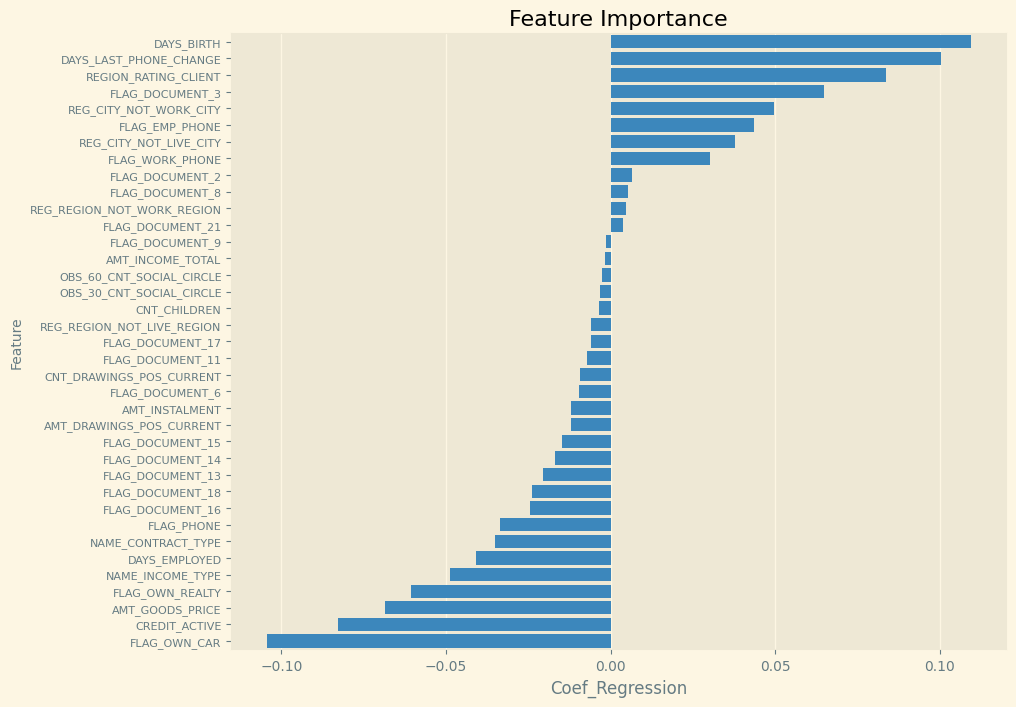

In [128]:
plt.figure(figsize=(10,8))
sns.barplot(x=Reg['Coef_Regression'],y=Reg['Feature'])
plt.title('Feature Importance')
plt.ylabel('Feature', size=10)
plt.yticks(size=8)
plt.show()